In [1]:
from __future__ import division
from __future__ import print_function
from jinja2 import Template

import data_tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import itertools


%matplotlib inline

In [2]:
root_path = '/home/ruffsl/Desktop/bag_final';
bag_folder_names = [
    'ojflo_data',
    'ojflo_occ',
    'ron_data',
    'ron_occ',
    'tide',
    'ojflo_data_svo',
    'ojflo_occ_svo',
    'ron_data_svo',
    'ron_occ_svo',
    ]

In [10]:
! cp bag2file.bash {root_path}
! cd {root_path} && ./bag2file.bash

Extracting: ojflo_data.bag
Extracting: ojflo_data_svo.bag
Extracting: ojflo_occ.bag
Extracting: ojflo_occ_svo.bag
Extracting: ron_data.bag
Extracting: ron_data_svo.bag
Extracting: ron_occ.bag
Extracting: ron_occ_svo.bag
Extracting: tide.bag
Extracting: tide_occ.bag


In [11]:
for bag in bag_folder_names:
    print(bag,':')
    folder_path = os.path.join(root_path, bag)
    data_tools.synchronize_Object_TF_Pose(folder_path)

ojflo_data :
	base_df2:  (2452, 7)
	object_df2:  (2454, 7)
ojflo_occ :
	base_df2:  (2440, 7)
	object_df2:  (2457, 7)
ron_data :
	base_df2:  (2367, 7)
	object_df2:  (2376, 7)
ron_occ :
	base_df2:  (2689, 7)
	object_df2:  (2700, 7)
tide :
	base_df2:  (2926, 7)
	object_df2:  (2938, 7)
ojflo_data_svo :
	base_df2:  (2265, 7)
	object_df2:  (2266, 7)
ojflo_occ_svo :
	base_df2:  (1847, 7)
	object_df2:  (1861, 7)
ron_data_svo :
	base_df2:  (2234, 7)
	object_df2:  (2241, 7)
ron_occ_svo :
	base_df2:  (2640, 7)
	object_df2:  (2651, 7)


In [12]:
for bag in bag_folder_names:
    print(bag,':')
    base_poses_path = os.path.join(root_path, bag, 'base_sync.txt')
    object_poses_path = os.path.join(root_path, bag, 'object_sync.txt')
    object_error_path = os.path.join(root_path, bag, 'object_error.txt')
    data_tools.getGlobalErrors(base_poses_path, object_poses_path, object_error_path)

ojflo_data :
ojflo_occ :
ron_data :
ron_occ :
tide :
ojflo_data_svo :
ojflo_occ_svo :
ron_data_svo :
ron_occ_svo :


In [4]:
def read_error(file_path):
    error_df = pd.read_csv(file_path, header=None)
    return error_df

def plot_error(error_df, error_th):
    error_df.plot(ylim=[0, error_th])
#     error_df.plot()
    
def filter_error(error_df, error_th):
    error_df[(error_df>=error_th)] = pd.NaT
    return error_df

def get_ratio(error_df, error_th):
    drops = error_df>=error_th
    return np.sum(drops)/len(drops)

def get_mean(error_df):
    return error_df.mean(axis=0)

ojflo_data :
	Ratio:  95.2691680261
	Mean:  1.00679091123


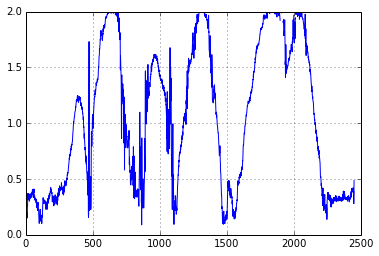

ojflo_occ :
	Ratio:  98.8524590164
	Mean:  0.374302940869


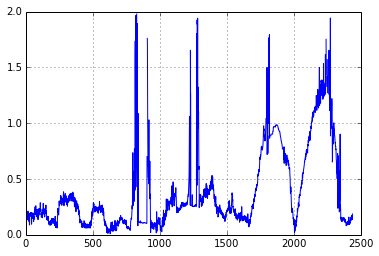

ron_data :
	Ratio:  97.8031263202
	Mean:  0.856216231959


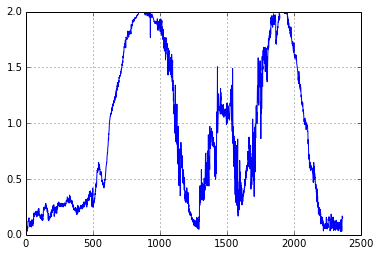

ron_occ :
	Ratio:  99.1818519896
	Mean:  0.430669521786


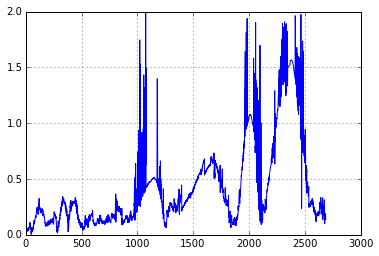

tide :
	Ratio:  94.3267259057
	Mean:  0.924287937761


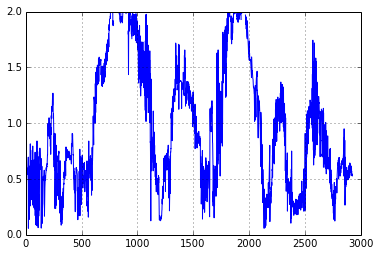

ojflo_data_svo :
	Ratio:  97.3509933775
	Mean:  0.997402586249


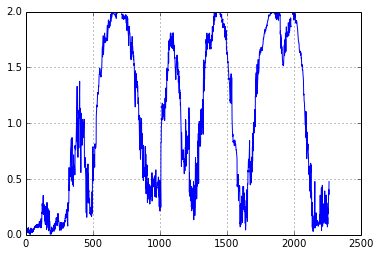

ojflo_occ_svo :
	Ratio:  99.7292907417
	Mean:  0.424847212441


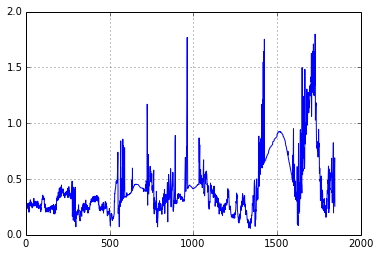

ron_data_svo :
	Ratio:  97.1799462847
	Mean:  0.897243101716


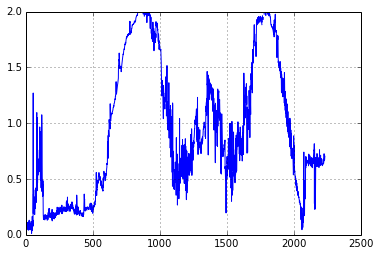

ron_occ_svo :
	Ratio:  98.9393939394
	Mean:  0.433038821897


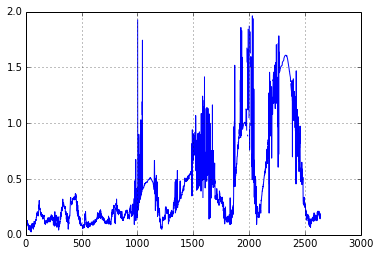

In [5]:
error_th = 2.0

results = {}

for bag in bag_folder_names:
    print(bag,':')
    file_path = os.path.join(root_path, bag, 'object_error.txt')
    error_df = read_error(file_path)[0]
    ratio = 100 - 100*get_ratio(error_df, error_th)
    print('\tRatio: ', ratio)
    error_df = filter_error(error_df, error_th)
    mean = get_mean(error_df)
    print('\tMean: ', mean)
    plt.figure()
    plot_error(error_df, error_th)
    plt.show()
    bag_results = {'ratio':"{:0.2f}%".format(ratio),
                   'mean':"{:0.3f} m".format(mean)}
    results[bag] = bag_results
    
#     break

In [6]:
results

{'ojflo_data': {'mean': '1.007 m', 'ratio': '95.27%'},
 'ojflo_data_svo': {'mean': '0.997 m', 'ratio': '97.35%'},
 'ojflo_occ': {'mean': '0.374 m', 'ratio': '98.85%'},
 'ojflo_occ_svo': {'mean': '0.425 m', 'ratio': '99.73%'},
 'ron_data': {'mean': '0.856 m', 'ratio': '97.80%'},
 'ron_data_svo': {'mean': '0.897 m', 'ratio': '97.18%'},
 'ron_occ': {'mean': '0.431 m', 'ratio': '99.18%'},
 'ron_occ_svo': {'mean': '0.433 m', 'ratio': '98.94%'},
 'tide': {'mean': '0.924 m', 'ratio': '94.33%'}}

In [8]:
template = data_tools.texenv.get_template('template.tex')
output = template.render(results=results)
print(output)

% Please add the following required packages to your document preamble:
% \usepackage{multirow}
\begin{table}[]
\centering
\caption{Translational Tracking Error for 2.0 m threshold. Ratio is computed from number of frames with error under threshold, while mean is then derived from those same frames}
\label{my-label}
\begin{tabular}{lllll}

                             &                            & \multicolumn{3}{c}{Methods}                                                   \\ \hline
                             &                            & IRLS                  & Particle              & Approach                      \\ \hline
\multirow{2}{*}{ojflo\_data} & \multicolumn{1}{l|}{mean}  & \multicolumn{1}{l|}{} & \multicolumn{1}{l|}{} & \multicolumn{1}{l|}{1.007 m}  \\ \cline{2-5} 
                             & \multicolumn{1}{l|}{ratio} & \multicolumn{1}{l|}{} & \multicolumn{1}{l|}{} & \multicolumn{1}{l|}{95.27\%}  \\ \hline
\multirow{2}{*}{ojflo\_occ}  & \multicolumn{1}{l|}{mean}  & 